<a href="https://www.kaggle.com/code/junannahian/pancreatic-cancer-final?scriptVersionId=255805036" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [241]:
!pip install --upgrade pip

In [242]:
!pip install imbalanced-learn

In [243]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [244]:
pip install scikeras

  Using cached scikit_learn-1.7.1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 62.0 MB/s  0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.7.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [245]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [246]:
!pip install scikit-learn==1.2.2 imbalanced-learn==0.10.1



  Using cached scikit_learn-1.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.7.1
    Uninstalling scikit-learn-1.7.1:
      Successfully uninstalled scikit-learn-1.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikeras 0.13.0 requires scikit-learn>=1.4.2, but you have scikit-learn 1.2.2 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.


In [247]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy
import time

from imblearn.over_sampling import SMOTE
from collections import Counter
import itertools

from sklearn.tree import DecisionTreeClassifier
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout,Activation,BatchNormalization
from scikeras import wrappers
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve, auc as auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_score,cross_val_predict, cross_validate
from sklearn.metrics import make_scorer,precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier




In [248]:

file_path =("/kaggle/input/d/johnjdavisiv/urinary-biomarkers-for-pancreatic-cancer/Debernardi et al 2020 data.csv")
df = pd.read_csv(file_path)
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


sample_id patient_cohort sample_origin  age sex  diagnosis stage  \
0          S1        Cohort1          BPTB   33   F          1   NaN   
1         S10        Cohort1          BPTB   81   F          1   NaN   
2        S100        Cohort2          BPTB   51   M          1   NaN   
3        S101        Cohort2          BPTB   61   M          1   NaN   
4        S102        Cohort2          BPTB   62   M          1   NaN   
..        ...            ...           ...  ...  ..        ...   ...   
585      S549        Cohort2          BPTB   68   M          3    IV   
586      S558        Cohort2          BPTB   71   F          3    IV   
587      S560        Cohort2          BPTB   63   M          3    IV   
588      S583        Cohort2          BPTB   75   F          3    IV   
589      S590        Cohort1          BPTB   74   M          3    IV   

    benign_sample_diagnosis  plasma_CA19_9  creatinine     LYVE1       REG1B  \
0                       NaN           11.7     1.83222  0.893219   52.948840   
1                       NaN            NaN     0.97266  2.037585   94.467030   
2                       NaN            7.0     0.78039  0.145589  102.366000   
3                       NaN            8.0     0.70122  0.002805   60.579000   
4                       NaN            9.0     0.21489  0.000860   65.540000   
..                      ...            ...         ...       ...         ...   
585                     NaN            NaN     0.52026  7.058209  156.241000   
586                     NaN            NaN     0.85956  8.341207   16.915000   
587                     NaN            NaN     1.36851  7.674707  289.701000   
588                     NaN            NaN     1.33458  8.206777  205.930000   
589                     NaN         1488.0     1.50423  8.200958  411.938275   

            TFF1      REG1A  
0     654.282174   1262.000  
1     209.488250    228.407  
2     461.141000        NaN  
3     142.950000        NaN  
4      41.088000        NaN  
..           ...        ...  
585   525.178000        NaN  
586   245.947000        NaN  
587   537.286000        NaN  
588   722.523000        NaN  
589  2021.321078  13200.000  

[590 rows x 14 columns]

In [249]:
df = df.drop(['sample_id'], axis=1)
df.head(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


patient_cohort sample_origin  age sex  diagnosis stage  \
0        Cohort1          BPTB   33   F          1   NaN   
1        Cohort1          BPTB   81   F          1   NaN   
2        Cohort2          BPTB   51   M          1   NaN   
3        Cohort2          BPTB   61   M          1   NaN   
4        Cohort2          BPTB   62   M          1   NaN   

  benign_sample_diagnosis  plasma_CA19_9  creatinine     LYVE1      REG1B  \
0                     NaN           11.7     1.83222  0.893219   52.94884   
1                     NaN            NaN     0.97266  2.037585   94.46703   
2                     NaN            7.0     0.78039  0.145589  102.36600   
3                     NaN            8.0     0.70122  0.002805   60.57900   
4                     NaN            9.0     0.21489  0.000860   65.54000   

         TFF1     REG1A  
0  654.282174  1262.000  
1  209.488250   228.407  
2  461.141000       NaN  
3  142.950000       NaN  
4   41.088000       NaN

In [250]:
df.tail(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


patient_cohort sample_origin  age sex  diagnosis stage  \
585        Cohort2          BPTB   68   M          3    IV   
586        Cohort2          BPTB   71   F          3    IV   
587        Cohort2          BPTB   63   M          3    IV   
588        Cohort2          BPTB   75   F          3    IV   
589        Cohort1          BPTB   74   M          3    IV   

    benign_sample_diagnosis  plasma_CA19_9  creatinine     LYVE1       REG1B  \
585                     NaN            NaN     0.52026  7.058209  156.241000   
586                     NaN            NaN     0.85956  8.341207   16.915000   
587                     NaN            NaN     1.36851  7.674707  289.701000   
588                     NaN            NaN     1.33458  8.206777  205.930000   
589                     NaN         1488.0     1.50423  8.200958  411.938275   

            TFF1    REG1A  
585   525.178000      NaN  
586   245.947000      NaN  
587   537.286000      NaN  
588   722.523000      NaN  
589  2021.321078  13200.0

In [251]:
from sklearn.preprocessing import LabelEncoder

In [252]:
df.isnull().sum()

patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                      391
benign_sample_diagnosis    382
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64

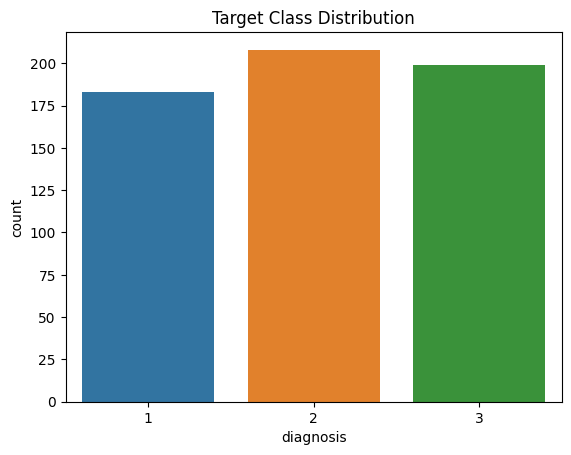

In [253]:
# Check the first few rows
df.head()

# Check data types
df.dtypes

# Check missing values
df.isnull().sum()

# Check target distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='diagnosis', data=df)
plt.title('Target Class Distribution')
plt.show()


In [254]:
df['diagnosis'].value_counts()


diagnosis
2    208
3    199
1    183
Name: count, dtype: int64

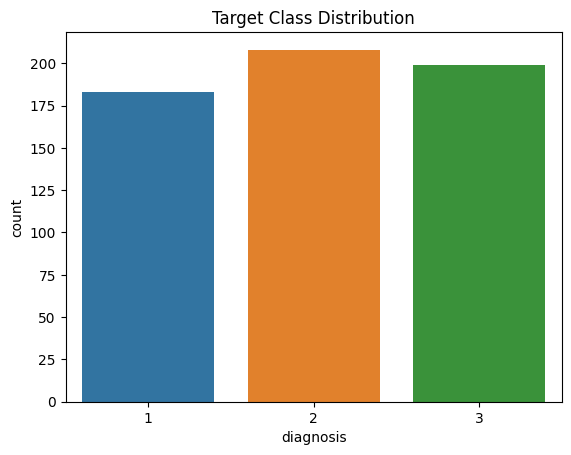

In [255]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='diagnosis', data=df)
plt.title("Target Class Distribution")
plt.show()


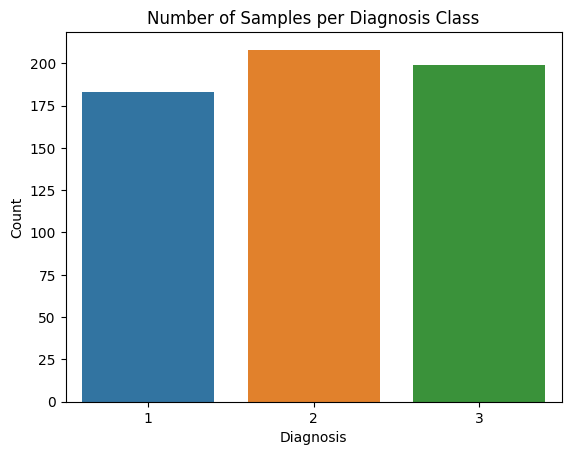

In [256]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='diagnosis', data=df)
plt.title('Number of Samples per Diagnosis Class')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.savefig('Number_of_samples_per_diagnosis.pdf', bbox_inches='tight')
plt.show()


In [257]:
df['diagnosis'].unique()


array([1, 2, 3])

In [258]:
df = df[df['diagnosis'] != 'invalid_value_here']


In [259]:
df['diagnosis'].value_counts()


diagnosis
2    208
3    199
1    183
Name: count, dtype: int64

In [260]:
X = df.drop(columns=['diagnosis'])  # Features
y = df['diagnosis']                 # Target


In [261]:
# Display the first few rows to inspect the dataset
df.head()



/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


patient_cohort sample_origin  age sex  diagnosis stage  \
0        Cohort1          BPTB   33   F          1   NaN   
1        Cohort1          BPTB   81   F          1   NaN   
2        Cohort2          BPTB   51   M          1   NaN   
3        Cohort2          BPTB   61   M          1   NaN   
4        Cohort2          BPTB   62   M          1   NaN   

  benign_sample_diagnosis  plasma_CA19_9  creatinine     LYVE1      REG1B  \
0                     NaN           11.7     1.83222  0.893219   52.94884   
1                     NaN            NaN     0.97266  2.037585   94.46703   
2                     NaN            7.0     0.78039  0.145589  102.36600   
3                     NaN            8.0     0.70122  0.002805   60.57900   
4                     NaN            9.0     0.21489  0.000860   65.54000   

         TFF1     REG1A  
0  654.282174  1262.000  
1  209.488250   228.407  
2  461.141000       NaN  
3  142.950000       NaN  
4   41.088000       NaN

In [262]:
X.head()  # Shows the first 5 rows of feature columns
y.head()  # Shows the first 5 values of the target column


0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [263]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   patient_cohort           590 non-null    object 
 1   sample_origin            590 non-null    object 
 2   age                      590 non-null    int64  
 3   sex                      590 non-null    object 
 4   diagnosis                590 non-null    int64  
 5   stage                    199 non-null    object 
 6   benign_sample_diagnosis  208 non-null    object 
 7   plasma_CA19_9            350 non-null    float64
 8   creatinine               590 non-null    float64
 9   LYVE1                    590 non-null    float64
 10  REG1B                    590 non-null    float64
 11  TFF1                     590 non-null    float64
 12  REG1A                    306 non-null    float64
dtypes: float64(6), int64(2), object(5)
memory usage: 60.1+ KB


In [264]:
categorical_cols = ['sex', 'stage', 'benign_sample_diagnosis', 'sample_origin', 'patient_cohort']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [265]:
# -----------------------------
# 1. Convert boolean columns to int (if any exist)
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

# -----------------------------
# 2. Encode categorical (object) columns to numeric
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Select object/string columns (like 'sex', 'stage', etc.)
object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    df[col] = df[col].astype(str)  # Ensure all values are strings
    df[col] = label_encoder.fit_transform(df[col])

# -----------------------------
# 3. Check result
print(df.head())
print(df.dtypes)


   patient_cohort  sample_origin  age  sex  diagnosis  stage  \
0               0              0   33    0          1      8   
1               0              0   81    0          1      8   
2               1              0   51    1          1      8   
3               1              0   61    1          1      8   
4               1              0   62    1          1      8   

   benign_sample_diagnosis  plasma_CA19_9  creatinine     LYVE1      REG1B  \
0                       52           11.7     1.83222  0.893219   52.94884   
1                       52            NaN     0.97266  2.037585   94.46703   
2                       52            7.0     0.78039  0.145589  102.36600   
3                       52            8.0     0.70122  0.002805   60.57900   
4                       52            9.0     0.21489  0.000860   65.54000   

         TFF1     REG1A  
0  654.282174  1262.000  
1  209.488250   228.407  
2  461.141000       NaN  
3  142.950000       NaN  
4   41.088000   

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [266]:
df.head()


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


patient_cohort  sample_origin  age  sex  diagnosis  stage  \
0               0              0   33    0          1      8   
1               0              0   81    0          1      8   
2               1              0   51    1          1      8   
3               1              0   61    1          1      8   
4               1              0   62    1          1      8   

   benign_sample_diagnosis  plasma_CA19_9  creatinine     LYVE1      REG1B  \
0                       52           11.7     1.83222  0.893219   52.94884   
1                       52            NaN     0.97266  2.037585   94.46703   
2                       52            7.0     0.78039  0.145589  102.36600   
3                       52            8.0     0.70122  0.002805   60.57900   
4                       52            9.0     0.21489  0.000860   65.54000   

         TFF1     REG1A  
0  654.282174  1262.000  
1  209.488250   228.407  
2  461.141000       NaN  
3  142.950000       NaN  
4   41.088000       NaN

In [267]:
df.tail()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


patient_cohort  sample_origin  age  sex  diagnosis  stage  \
585               1              0   68    1          3      7   
586               1              0   71    0          3      7   
587               1              0   63    1          3      7   
588               1              0   75    0          3      7   
589               0              0   74    1          3      7   

     benign_sample_diagnosis  plasma_CA19_9  creatinine     LYVE1       REG1B  \
585                       52            NaN     0.52026  7.058209  156.241000   
586                       52            NaN     0.85956  8.341207   16.915000   
587                       52            NaN     1.36851  7.674707  289.701000   
588                       52            NaN     1.33458  8.206777  205.930000   
589                       52         1488.0     1.50423  8.200958  411.938275   

            TFF1    REG1A  
585   525.178000      NaN  
586   245.947000      NaN  
587   537.286000      NaN  
588   722.523000      NaN  
589  2021.321078  13200.0

In [268]:
num_cols = df.shape[1]

print("Number of columns:", num_cols)

Number of columns: 13


In [269]:
num_cols = len(df.columns)  # ❌ This gives an integer

In [270]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

patient_cohort
Skew : 0.25


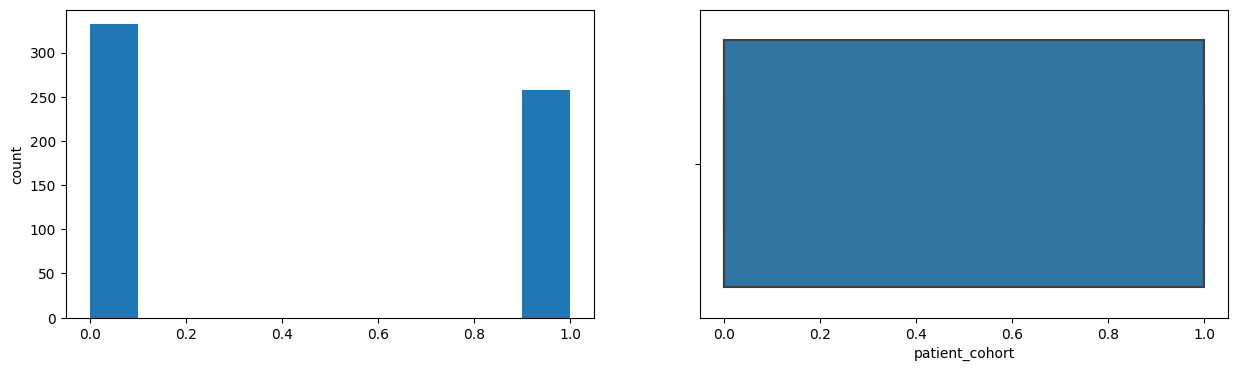

sample_origin
Skew : 1.12


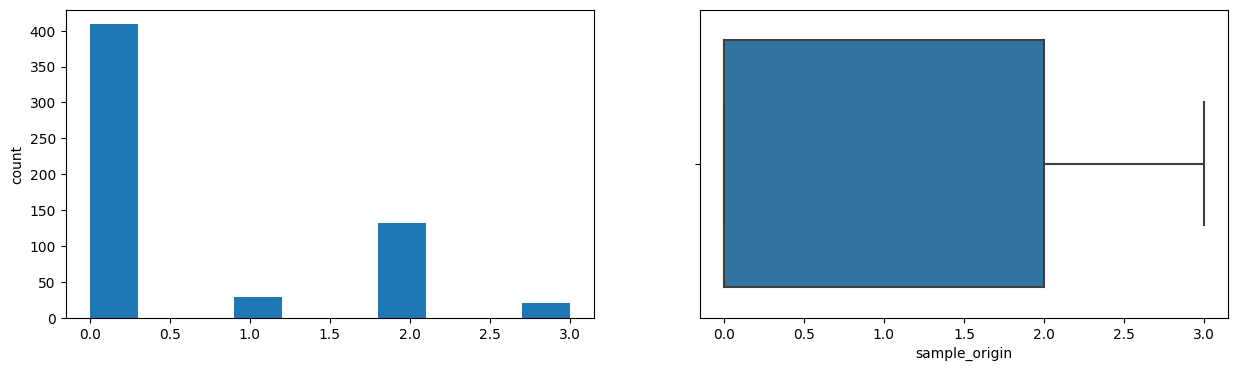

age
Skew : -0.22


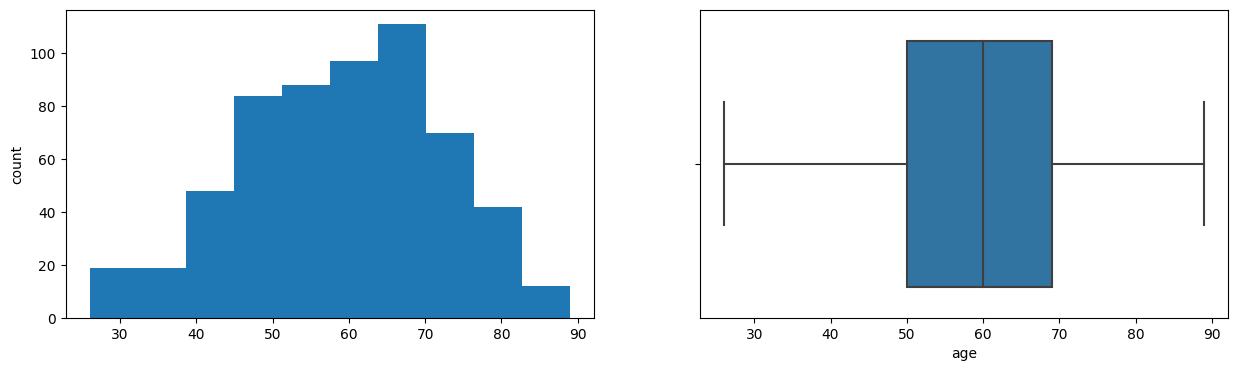

sex
Skew : 0.03


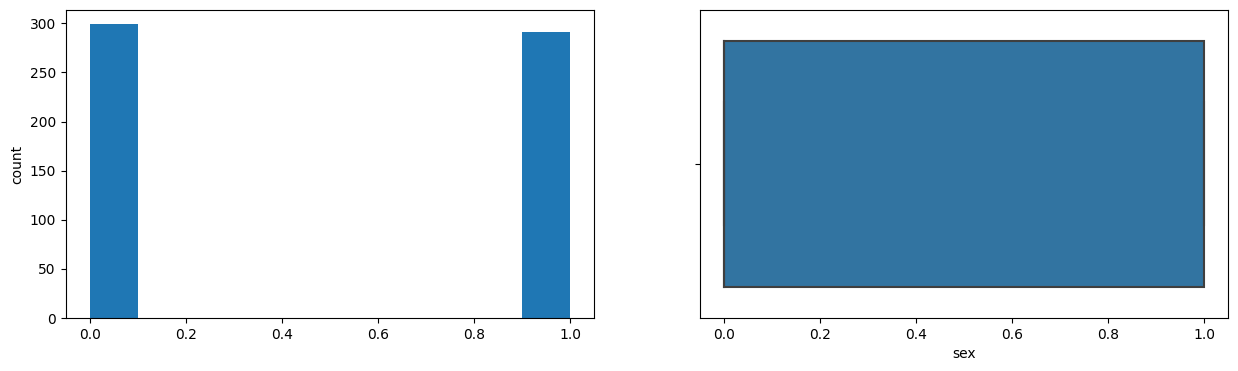

diagnosis
Skew : -0.05


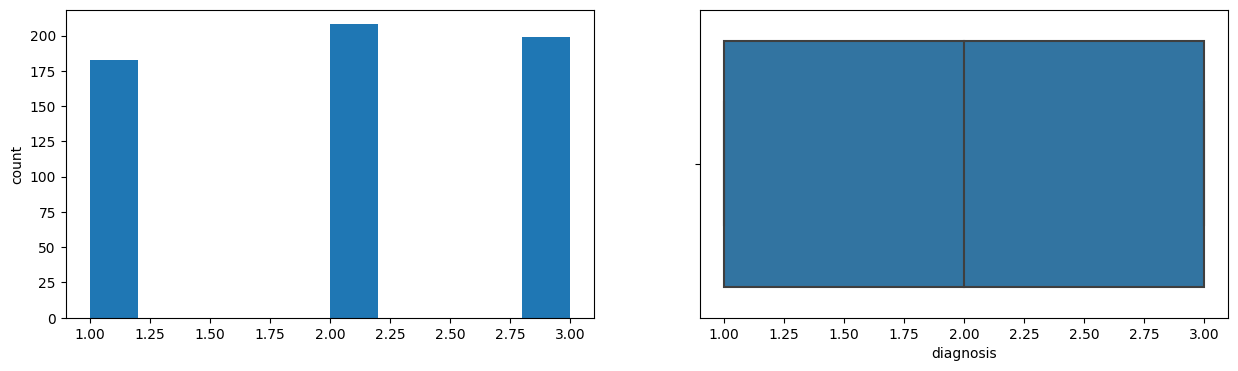

stage
Skew : -1.71


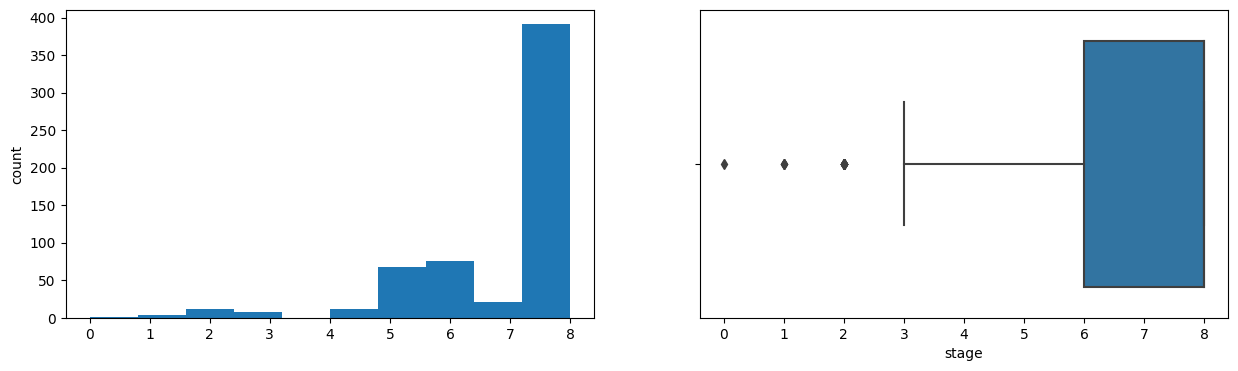

benign_sample_diagnosis
Skew : -1.25


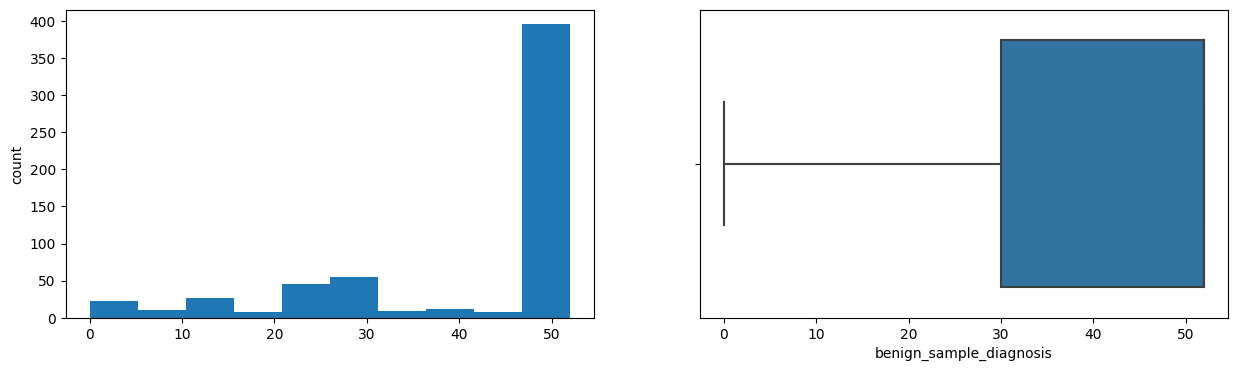

plasma_CA19_9
Skew : 8.02


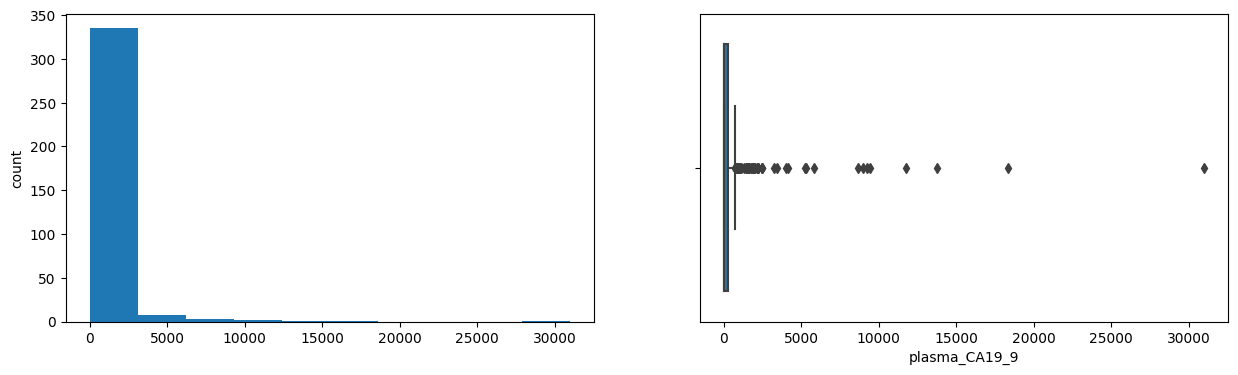

creatinine
Skew : 1.47


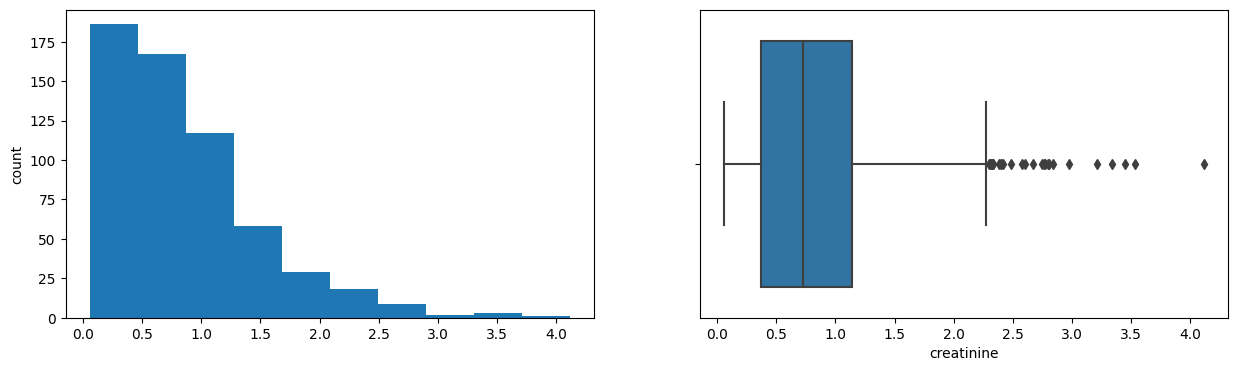

LYVE1
Skew : 1.39


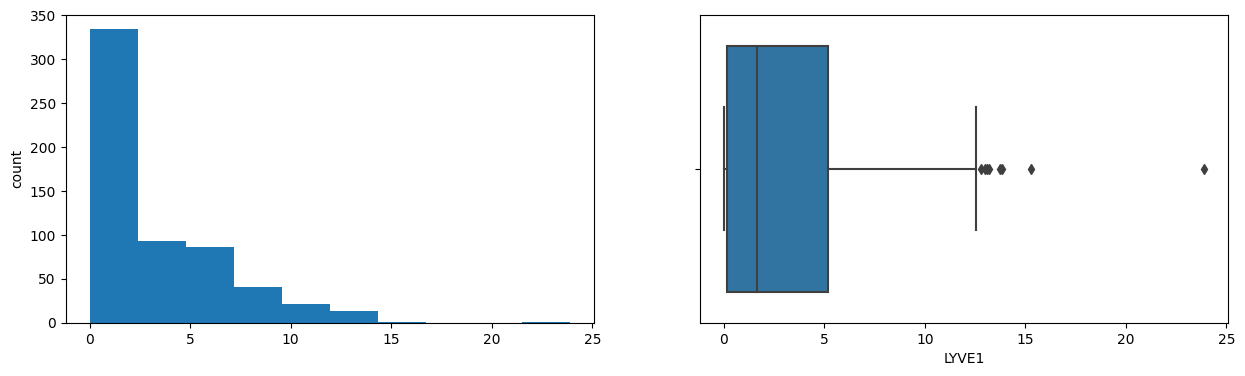

REG1B
Skew : 3.33


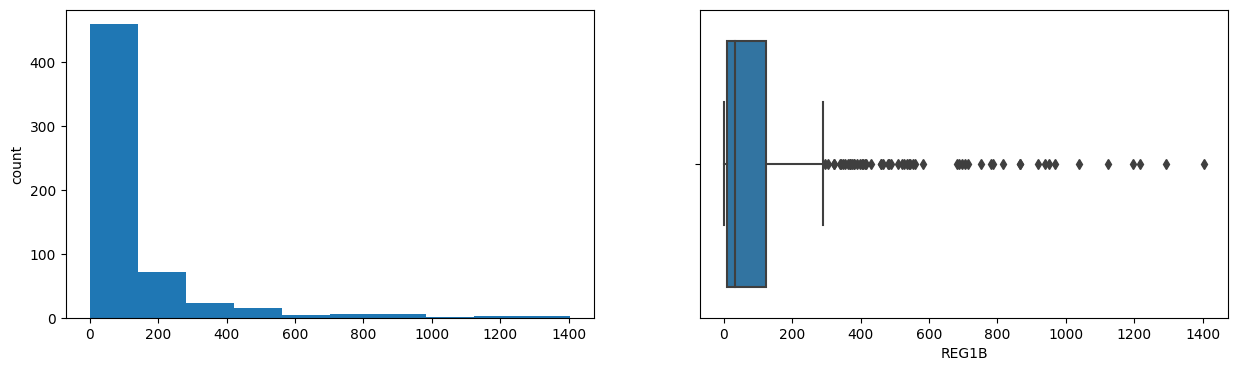

TFF1
Skew : 5.16


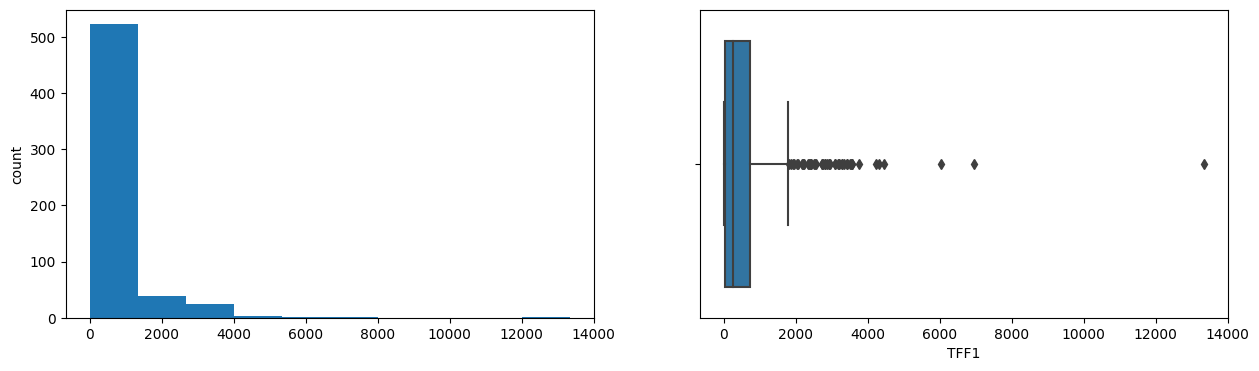

REG1A
Skew : 4.47


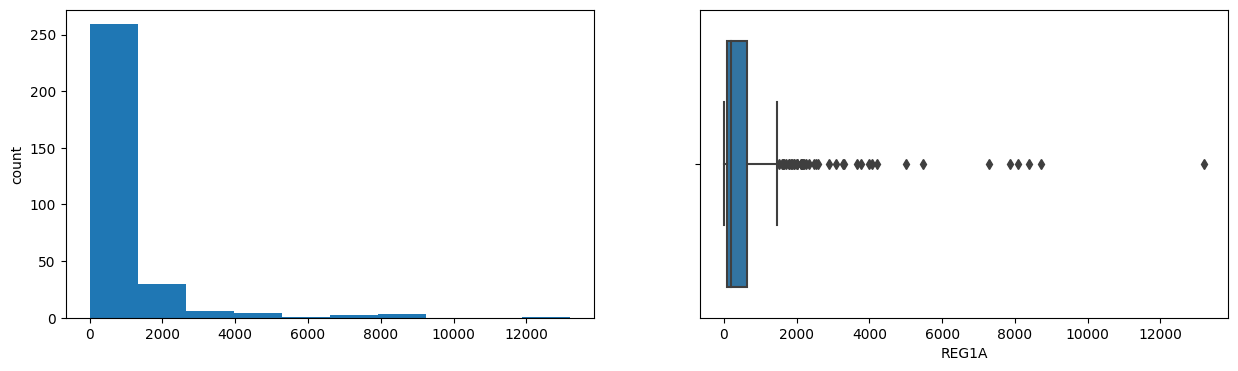

In [271]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

In [296]:
x = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [295]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels to 0, 1, 2 ...
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # This converts 1->0, 2->1, 3->2

# Split using the encoded labels
X_train, X_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)


In [298]:
from sklearn.impute import SimpleImputer

# Fill NaN with the mean (for numeric) or most frequent (for categorical)
imputer = SimpleImputer(strategy='mean')  # change to 'median' or 'most_frequent' if needed
X_train_imputed = imputer.fit_transform(X_train)

# SMOTE now works
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_imputed, y_train)


In [275]:
# -----------------------------
# 1. Impute missing values using the mean
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# -----------------------------
# 2. Normalize / scale features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [276]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


In [277]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [278]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train the model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
rf_model = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=42)

dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print results
print(f"Decision Tree Results:")
print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1 Score: {f1_dt}")


Decision Tree Results:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [279]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predict on test set
y_pred_knn = knn_model.predict(X_test)

# Calculate metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

# Print results
print(f"KNN Results:")
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1 Score: {f1_knn}")


KNN Results:
Accuracy: 0.8813559322033898
Precision: 0.8899963154016212
Recall: 0.8813559322033898
F1 Score: 0.8824455029664803


In [280]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# 1️⃣ Train the model
lr_model = LogisticRegression(max_iter=500, random_state=42)
lr_model.fit(X_train, y_train)

# 2️⃣ Predict
y_pred_lr = lr_model.predict(X_test)

# 3️⃣ Calculate metrics (weighted for multi-class)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

# 4️⃣ Print results
print(f"Accuracy: {accuracy_lr}")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1 Score: {f1_lr}")



Accuracy: 0.9915254237288136
Precision: 0.991727199354318
Recall: 0.9915254237288136
F1 Score: 0.9915214456770511


In [281]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(adaboost_model, X_train, y_train, cv=skf, scoring='accuracy')
print("Cross-validated Accuracy:", np.mean(scores))

adaboost_model.fit(X_train, y_train)

# Predict
y_pred_ada = adaboost_model.predict(X_test)

# Calculate metrics (weighted for multi-class)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada, average='weighted')
recall_ada = recall_score(y_test, y_pred_ada, average='weighted')
f1_ada = f1_score(y_test, y_pred_ada, average='weighted')

# Print results
print(f"Accuracy: {accuracy_ada}")
print(f"Precision: {precision_ada}")
print(f"Recall: {recall_ada}")
print(f"F1 Score: {f1_ada}")


Cross-validated Accuracy: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [282]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to training data only
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_res = imputer.fit_transform(X_train_res)
X_test = imputer.transform(X_test)

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# Train Naive Bayes on balanced data
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train_res, y_train_res)
y_pred_nb = nb_model.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

print(f"Accuracy: {accuracy_nb}")
print(f"Precision: {precision_nb}")
print(f"Recall: {recall_nb}")
print(f"F1 Score: {f1_nb}")


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [283]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Initialize SVM
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on test set
y_pred_svm = svm_model.predict(X_test)

# Calculate metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

# Print results
print(f"Accuracy: {accuracy_svm}")
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"F1 Score: {f1_svm}")


Accuracy: 0.9745762711864406
Precision: 0.9763097072419106
Recall: 0.9745762711864406
F1 Score: 0.9747454128841545


In [284]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Train XGBoost
import xgboost as xgb
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=42)
xgb_model.fit(X_train, y_train_enc)

# Predict
y_pred_xgb_enc = xgb_model.predict(X_test)
# Convert back to original labels if needed
y_pred_xgb = le.inverse_transform(y_pred_xgb_enc)

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

print(f"Accuracy: {accuracy_xgb}")
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print(f"F1 Score: {f1_xgb}")


Accuracy: 0.5677966101694916
Precision: 0.4248859482159582
Recall: 0.5677966101694916
F1 Score: 0.4618990597494205


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [285]:
# -----------------------------
# 1. Impute missing values using the mean
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# -----------------------------
# 2. Normalize / scale features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -----------------------------
# 3. One-hot encode the labels for ANN
from keras.utils import to_categorical

from keras.utils import to_categorical

# Shift labels 1,2,3 -> 0,1,2 and one-hot encode with explicit num_classes=3
y_train_cat = to_categorical(y_train - 1, num_classes=3)
y_test_cat = to_categorical(y_test - 1, num_classes=3)

# -----------------------------
# 4. Build the ANN
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input

ann_model = Sequential()
ann_model.add(Input(shape=(X_train.shape[1],)))  # first layer input
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(3, activation='softmax'))  # 3 classes


# -----------------------------
# 5. Compile the model
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# -----------------------------
# 6. Train the model
history = ann_model.fit(
    X_train, y_train_cat,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test_cat),
    verbose=1
)

# -----------------------------
# 7. Predict on test set
ann_predictions = ann_model.predict(X_test)
y_pred_ann = ann_predictions.argmax(axis=1) + 1  # convert back to original labels 1,2,3

# -----------------------------
# 8. Evaluate metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_ann)
precision = precision_score(y_test, y_pred_ann, average='weighted')
recall = recall_score(y_test, y_pred_ann, average='weighted')
f1 = f1_score(y_test, y_pred_ann, average='weighted')

# -----------------------------
# 9. Print results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4551 - loss: 1.0495 - val_accuracy: 0.8051 - val_loss: 0.8283
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7785 - loss: 0.7879 - val_accuracy: 0.8729 - val_loss: 0.6473
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8647 - loss: 0.6372 - val_accuracy: 0.9153 - val_loss: 0.4850
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8903 - loss: 0.4851 - val_accuracy: 0.9322 - val_loss: 0.3594
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9352 - loss: 0.3714 - val_accuracy: 0.9576 - val_loss: 0.2762
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9443 - loss: 0.2759 - val_accuracy: 0.9746 - val_loss: 0.2170
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9465 - loss: 0.2361 - val_accuracy: 0.9831 - val_loss: 0.1846
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9496 - loss: 0.2005 - val_accuracy: 0.9831 - val_loss

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [286]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Input

# Make sure X_train has 3D shape for LSTM: (samples, timesteps=1, features)
if len(X_train.shape) == 2:
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Force one-hot encoding to have 3 classes
from keras.utils import to_categorical
y_train_cat = to_categorical(y_train - 1, num_classes=3)
y_test_cat = to_categorical(y_test - 1, num_classes=3)

# Check shapes
print("X_train shape:", X_train.shape)
print("y_train_cat shape:", y_train_cat.shape)

# Build LSTM
model_lstm = Sequential()
model_lstm.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(LSTM(150, activation='relu', return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(150, activation='relu'))
model_lstm.add(Dense(3, activation='softmax'))  # 3 classes

# Compile
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
model_lstm.fit(X_train, y_train_cat, epochs=20, batch_size=32, validation_data=(X_test, y_test_cat))

# Predict
y_pred_lstm = model_lstm.predict(X_test).argmax(axis=1) + 1  # convert back to 1,2,3

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred_lstm)
precision = precision_score(y_test, y_pred_lstm, average='weighted')
recall = recall_score(y_test, y_pred_lstm, average='weighted')
f1 = f1_score(y_test, y_pred_lstm, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


X_train shape: (472, 1, 12)
y_train_cat shape: (472, 3)
Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - accuracy: 0.5789 - loss: 1.0904 - val_accuracy: 0.7797 - val_loss: 1.0543
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7797 - loss: 1.0351 - val_accuracy: 0.7373 - val_loss: 0.9344
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8227 - loss: 0.8834 - val_accuracy: 0.8305 - val_loss: 0.6866
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8692 - loss: 0.6220 - val_accuracy: 0.9407 - val_loss: 0.4233
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9217 - loss: 0.3810 - val_accuracy: 0.9576 - val_loss: 0.2290
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9412 - loss: 0.2115 - val_accuracy: 0.9746 - val_loss: 0.1643
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9584 - loss: 0.1666 - val_accuracy: 0.9746 - val_loss: 0.1280
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - ac

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4029 - loss: 1.0735
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8089 - loss: 0.7317
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9151 - loss: 0.4547
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9382 - loss: 0.2882
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9349 - loss: 0.1874
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9574 - loss: 0.1610
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9620 - loss: 0.1307
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9531 - loss: 0.1322
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9665 - loss: 0.1144
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9698 - loss: 0.0927
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9751 - loss: 0.0954
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9743 - loss: 0.0799


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4954 - loss: 1.0923
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6718 - loss: 1.0503
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6810 - loss: 0.8897
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7644 - loss: 0.6171
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9050 - loss: 0.3742
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9395 - loss: 0.2319
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9633 - loss: 0.1339
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9601 - loss: 0.1106
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9505 - loss: 0.1516
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9773 - loss: 0.0884
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9797 - loss: 0.0859
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9695 - loss: 0.0847


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

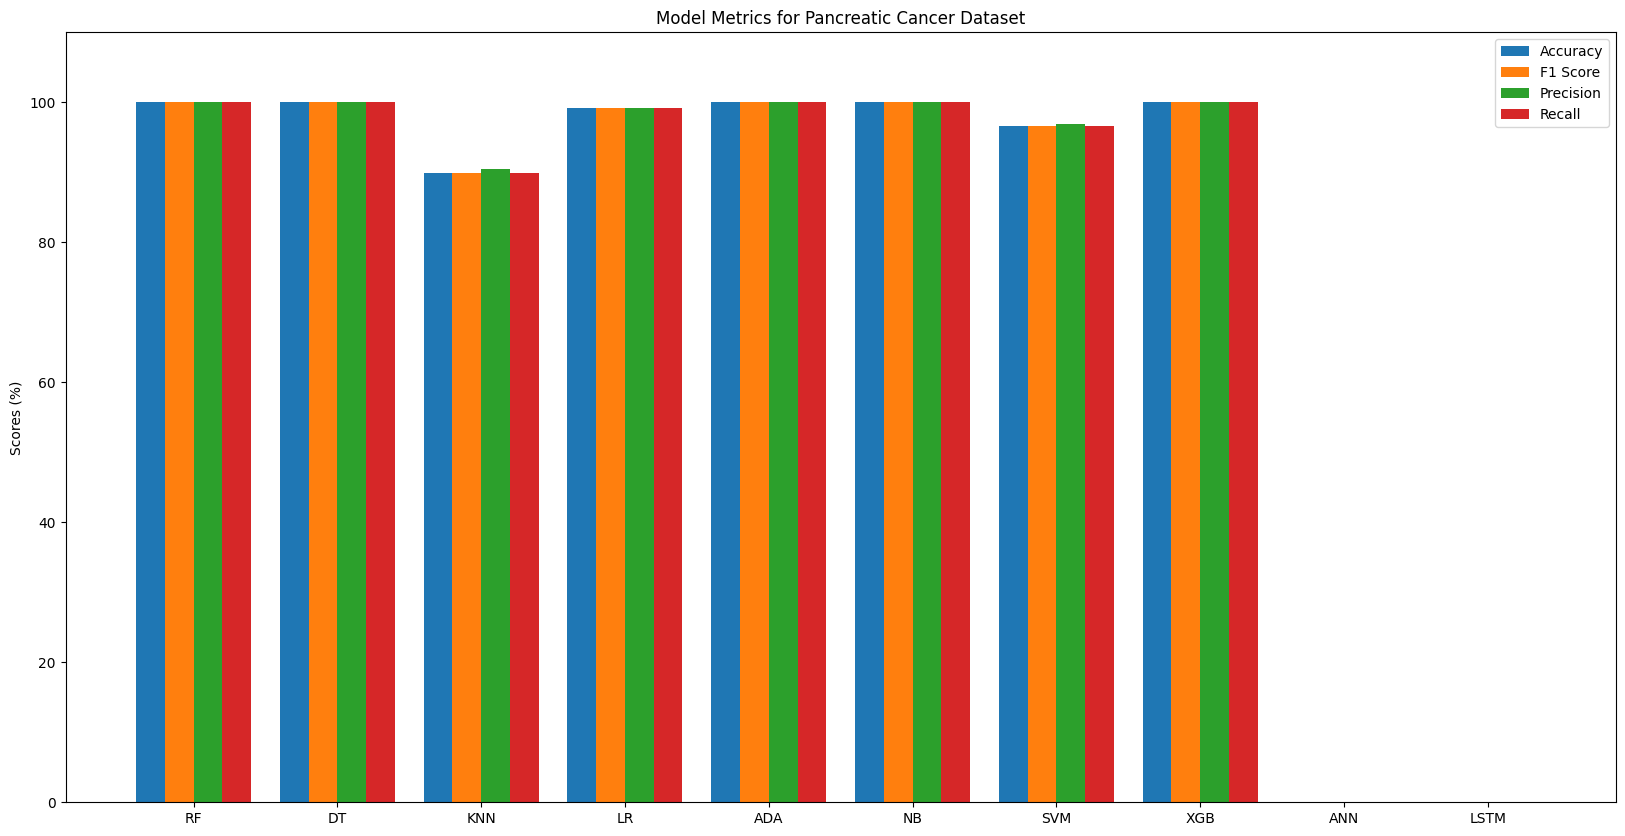

In [287]:
# -----------------------------
# 1. Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb

# Keras for ANN and LSTM
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

# -----------------------------
# 2. Prepare data (replace with your dataframe 'df')
# X = features, y = target ('diagnosis' or 'classification')
x = df.drop(columns=['diagnosis'])  # or ['classification'] depending on your column
y = df['diagnosis']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(x)

# Feature scaling
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# -----------------------------
# 3. Train models and get predictions

# 3.1 Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 3.2 Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# 3.3 KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# 3.4 Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# 3.5 AdaBoost
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)

# 3.6 Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# 3.7 SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# 3.8 XGBoost
# -----------------------------
# 3.8 XGBoost (fix label shift)
import xgboost as xgb

# Shift labels to start from 0
y_train_xgb = y_train - 1
y_test_xgb = y_test - 1

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train_xgb)

# Predict (shift back to original labels)
y_pred_xgb = xgb_model.predict(X_test) + 1


# 3.9 ANN
# Shift labels from 1,2,3 -> 0,1,2
y_train_ann = y_train - 1
y_test_ann = y_test - 1

# ANN
ann_model = Sequential()
ann_model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))  # use input_shape, not input_dim
ann_model.add(Dropout(0.2))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(3, activation='softmax'))  # 3 classes

ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ann_model.fit(X_train, y_train_ann, epochs=20, batch_size=16, verbose=1)
y_pred_ann = np.argmax(ann_model.predict(X_test), axis=1)


# 3.10 LSTM (reshape data for LSTM)
# Shift labels from 1,2,3 -> 0,1,2
y_train_lstm_fixed = y_train - 1
y_test_lstm_fixed = y_test - 1

# Reshape data for LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM
lstm_model = Sequential()
lstm_model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(32, activation='relu'))
lstm_model.add(Dense(3, activation='softmax'))

# Compile
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit
lstm_model.fit(X_train_lstm, y_train_lstm_fixed, epochs=20, batch_size=16, verbose=1)

# Predict
y_pred_lstm = np.argmax(lstm_model.predict(X_test_lstm), axis=1)
y_pred_lstm_original = y_pred_lstm + 1  # back to original labels 1,2,3


# -----------------------------
# 4. Calculate metrics
models = ['RF', 'DT', 'KNN', 'LR', 'ADA', 'NB', 'SVM', 'XGB', 'ANN', 'LSTM']

accuracy_list = [accuracy_score(y_test, y_pred_rf),
                 accuracy_score(y_test, y_pred_dt),
                 accuracy_score(y_test, y_pred_knn),
                 accuracy_score(y_test, y_pred_lr),
                 accuracy_score(y_test, y_pred_ada),
                 accuracy_score(y_test, y_pred_nb),
                 accuracy_score(y_test, y_pred_svm),
                 accuracy_score(y_test, y_pred_xgb),
                 accuracy_score(y_test, y_pred_ann),
                 accuracy_score(y_test, y_pred_lstm)]

precision_list = [precision_score(y_test, y_pred_rf, average='weighted'),
                  precision_score(y_test, y_pred_dt, average='weighted'),
                  precision_score(y_test, y_pred_knn, average='weighted'),
                  precision_score(y_test, y_pred_lr, average='weighted'),
                  precision_score(y_test, y_pred_ada, average='weighted'),
                  precision_score(y_test, y_pred_nb, average='weighted'),
                  precision_score(y_test, y_pred_svm, average='weighted'),
                  precision_score(y_test, y_pred_xgb, average='weighted'),
                  precision_score(y_test, y_pred_ann, average='weighted'),
                  precision_score(y_test, y_pred_lstm, average='weighted')]

recall_list = [recall_score(y_test, y_pred_rf, average='weighted'),
               recall_score(y_test, y_pred_dt, average='weighted'),
               recall_score(y_test, y_pred_knn, average='weighted'),
               recall_score(y_test, y_pred_lr, average='weighted'),
               recall_score(y_test, y_pred_ada, average='weighted'),
               recall_score(y_test, y_pred_nb, average='weighted'),
               recall_score(y_test, y_pred_svm, average='weighted'),
               recall_score(y_test, y_pred_xgb, average='weighted'),
               recall_score(y_test, y_pred_ann, average='weighted'),
               recall_score(y_test, y_pred_lstm, average='weighted')]

f1_list = [f1_score(y_test, y_pred_rf, average='weighted'),
           f1_score(y_test, y_pred_dt, average='weighted'),
           f1_score(y_test, y_pred_knn, average='weighted'),
           f1_score(y_test, y_pred_lr, average='weighted'),
           f1_score(y_test, y_pred_ada, average='weighted'),
           f1_score(y_test, y_pred_nb, average='weighted'),
           f1_score(y_test, y_pred_svm, average='weighted'),
           f1_score(y_test, y_pred_xgb, average='weighted'),
           f1_score(y_test, y_pred_ann, average='weighted'),
           f1_score(y_test, y_pred_lstm, average='weighted')]

# -----------------------------
# 5. Plot grouped bar chart
x_pos = np.arange(len(models))
width = 0.2

# -----------------------------
# 5. Plot grouped bar chart
x_pos = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(x_pos - width*1.5, [a*100 for a in accuracy_list], width, label='Accuracy')
ax.bar(x_pos - width*0.5, [f*100 for f in f1_list], width, label='F1 Score')
ax.bar(x_pos + width*0.5, [p*100 for p in precision_list], width, label='Precision')
ax.bar(x_pos + width*1.5, [r*100 for r in recall_list], width, label='Recall')

ax.set_xticks(x_pos)
ax.set_xticklabels(models)
ax.set_ylabel('Scores (%)')
ax.set_ylim(0, 110)
ax.set_title('Model Metrics for Pancreatic Cancer Dataset')
ax.legend()
plt.show()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   patient_cohort           590 non-null    int64  
 1   sample_origin            590 non-null    int64  
 2   age                      590 non-null    int64  
 3   sex                      590 non-null    int64  
 4   diagnosis                590 non-null    int64  
 5   stage                    590 non-null    int64  
 6   benign_sample_diagnosis  590 non-null    int64  
 7   plasma_CA19_9            350 non-null    float64
 8   creatinine               590 non-null    float64
 9   LYVE1                    590 non-null    float64
 10  REG1B                    590 non-null    float64
 11  TFF1                     590 non-null    float64
 12  REG1A                    306 non-null    float64
dtypes: float64(6), int64(7)
memory usage: 60.1 KB
patient_cohort               0
sam

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

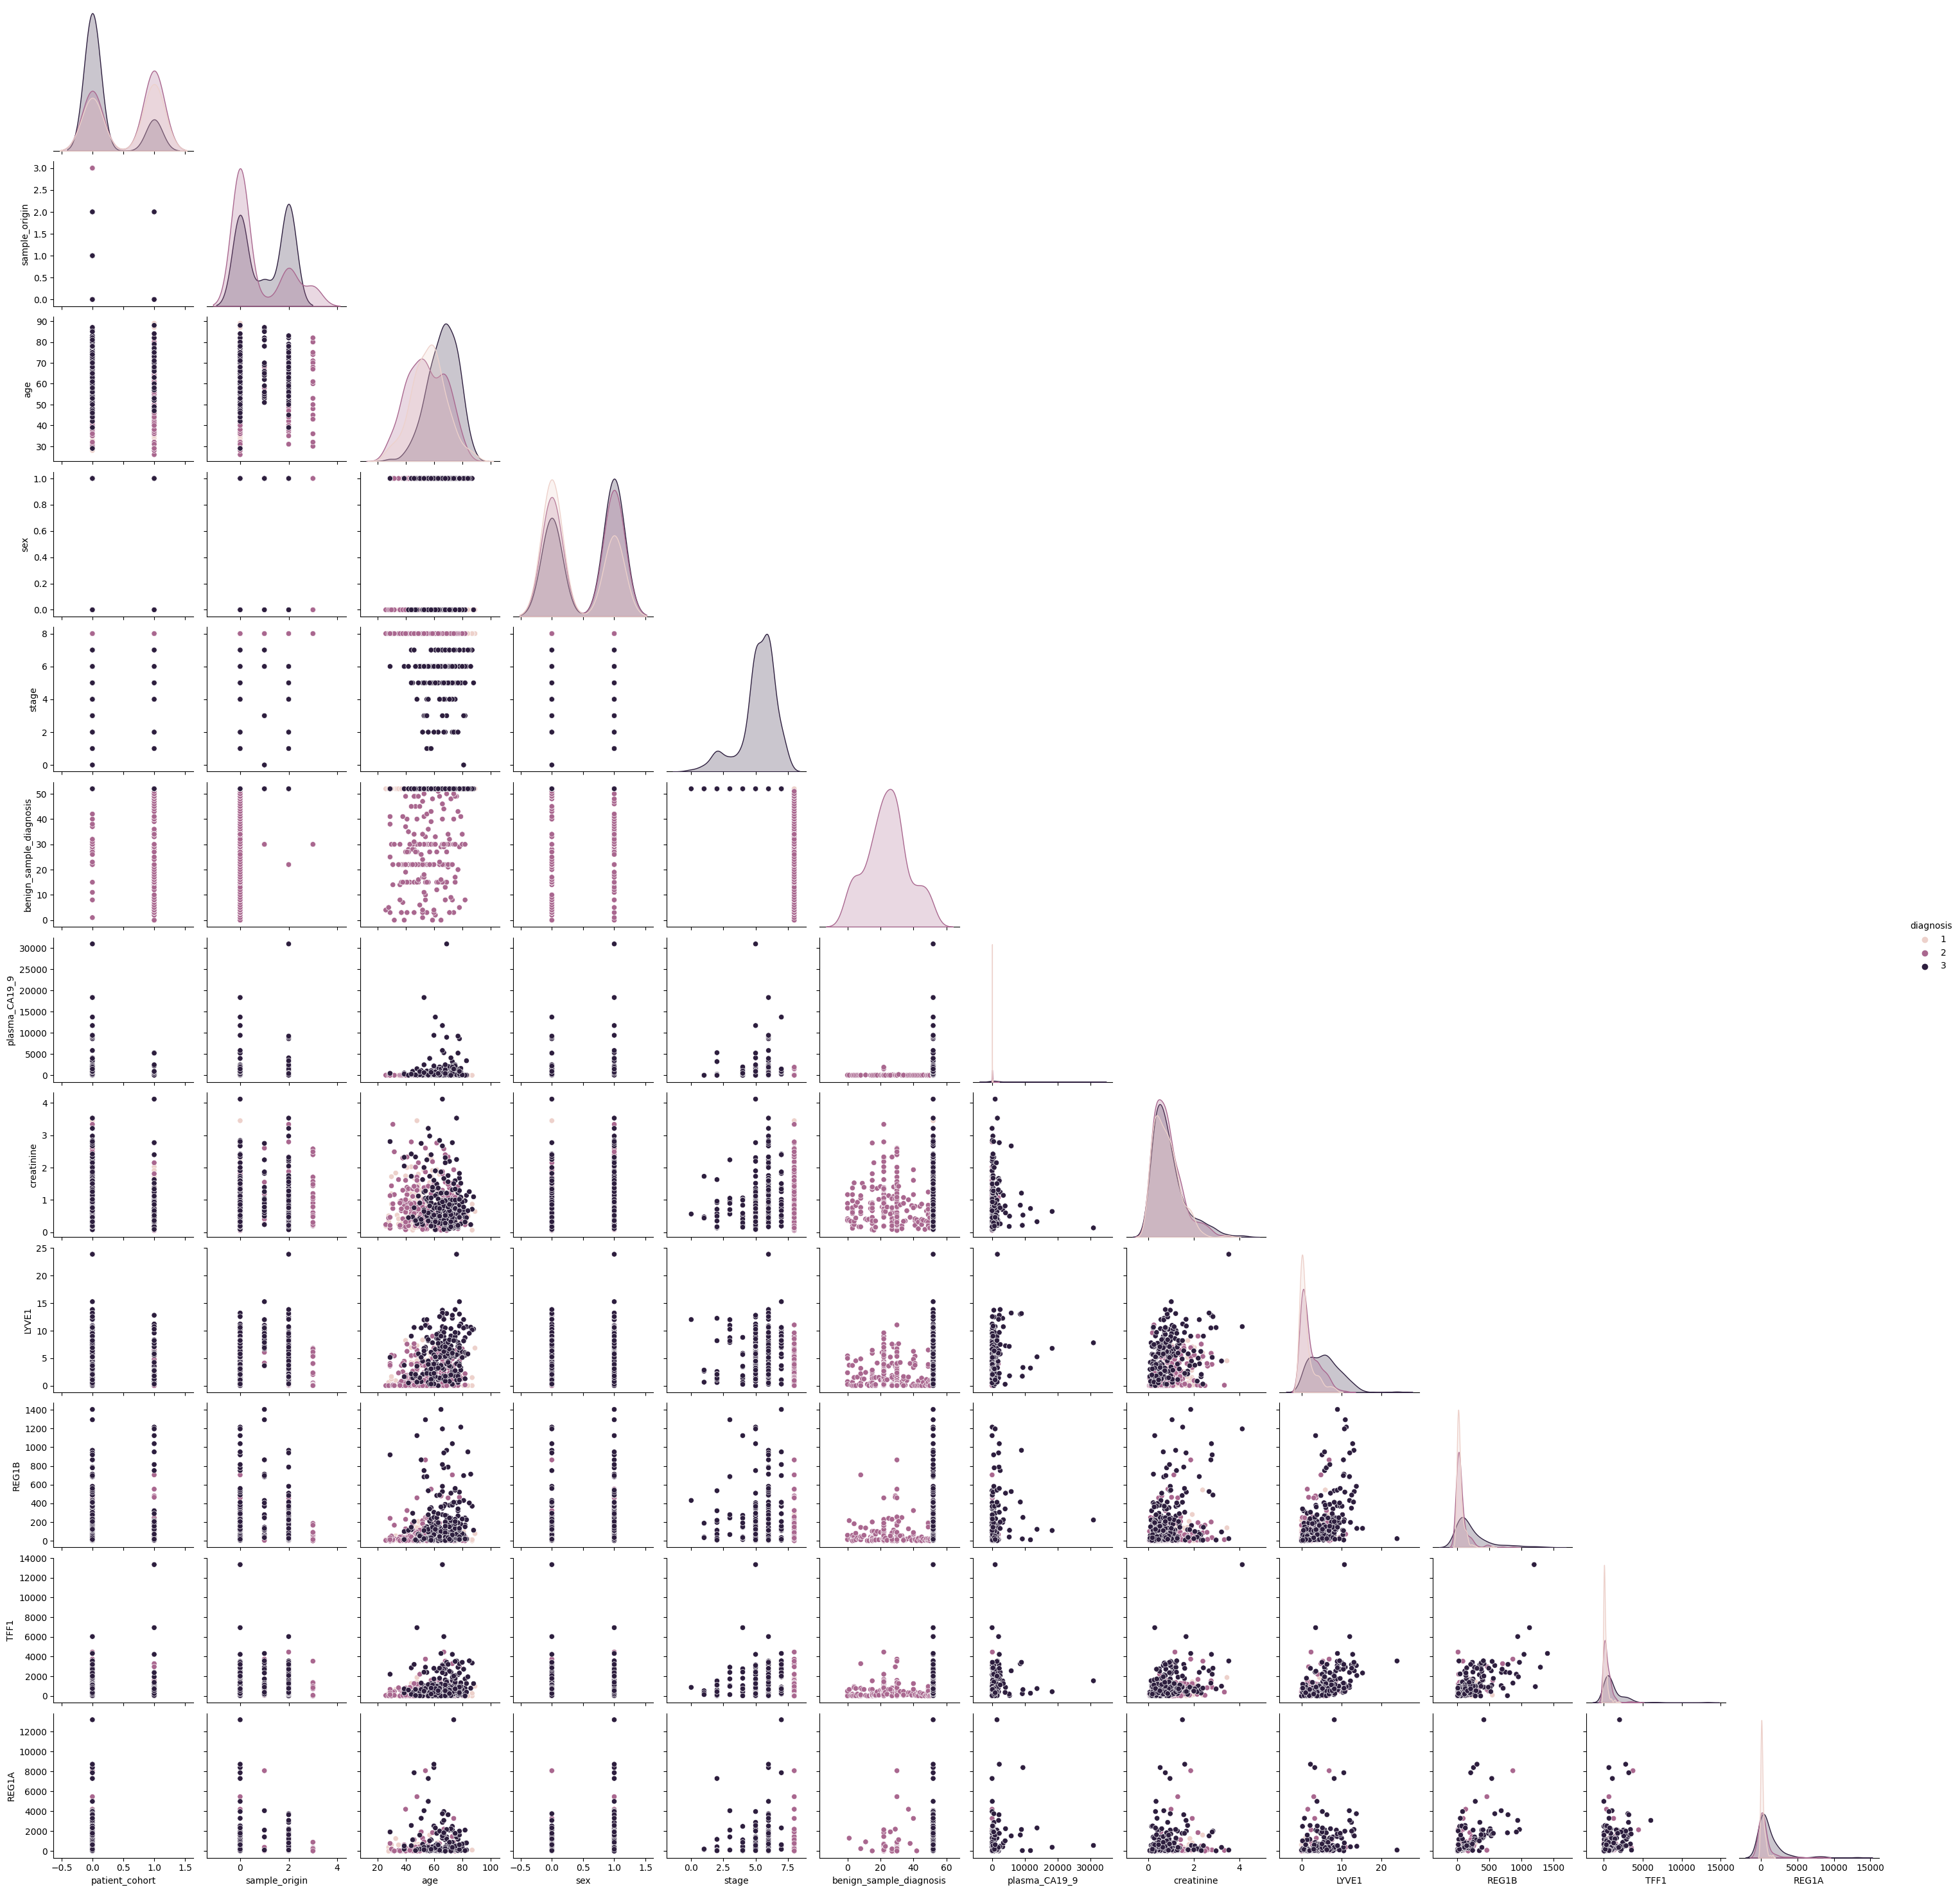

In [288]:
# Basic info about the dataframe
df.info()

# Optional: check for missing values
print(df.isnull().sum())

# Pairplot to visualize relationships between features, colored by target
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='diagnosis', diag_kind='kde', corner=True)
plt.show()


In [289]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Compute the correlation matrix (numeric columns only)
corr = df.corr(numeric_only=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(21, 21), dpi=700)

# Draw the heatmap with the mask
fig = sns.heatmap(corr, vmin=-0.1, vmax=1.0, mask=mask,
                  annot=True, fmt=".2f", cmap='coolwarm',
                  square=True, linewidths=0.9,
                  cbar_kws={"shrink":0.6, "pad":0.01})

# Adjust colorbar position
cbar = fig.collections[0].colorbar
cbar.ax.set_position([0.95, 0.1, 0.03, 0.8])

# Customize tick labels
cust_labels = df.select_dtypes(include=np.number).columns.tolist()  # numeric columns only
fig.set_yticklabels(cust_labels, rotation=0)
fig.set_xticklabels(cust_labels, rotation=45, ha='right')
fig.tick_params(axis='both', which='both', length=0)

# Title
plt.title("Correlation for Features Of Dataset A", fontsize=14)

# Save figure
plt.savefig("Correlation_for_Features_Of_Dataset_A.pdf", bbox_inches='tight')

# Show plot
plt.show()


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


In [290]:
import pandas as pd
import numpy as np

# Separate features and target
X_res = df.drop(columns=['diagnosis'])
y_res = df['diagnosis']

# Compute Entropy of a distribution
def entropy(y):
    value_counts = y.value_counts(normalize=True)
    return -np.sum(value_counts * np.log2(value_counts + 1e-9))  # add small epsilon to avoid log(0)

# Compute Information Gain
def information_gain(X, y, feature):
    base_entropy = entropy(y)
    feature_entropy = 0
    for value in X[feature].unique():
        subset = y[X[feature] == value]
        feature_entropy += (len(subset) / len(X)) * entropy(subset)
    return base_entropy - feature_entropy

# Compute Split Information
def split_information(X, feature):
    value_counts = X[feature].value_counts(normalize=True)
    return -np.sum(value_counts * np.log2(value_counts + 1e-9))

# Compute Gain Ratio
def gain_ratio(X, y, feature):
    ig = information_gain(X, y, feature)
    si = split_information(X, feature)
    return ig / (si + 1e-9)  # avoid division by zero

# Compute Gain Ratios for all features
gain_ratios = {feature: gain_ratio(X_res, y_res, feature) for feature in X_res.columns}

# Convert to a DataFrame for visualization
gain_ratio_results = pd.DataFrame(list(gain_ratios.items()), columns=['Feature', 'Gain Ratio'])
gain_ratio_results = gain_ratio_results.sort_values(by="Gain Ratio", ascending=False)

# Display the results
print(gain_ratio_results)


                    Feature  Gain Ratio
4                     stage    0.556748
5   benign_sample_diagnosis    0.373851
1             sample_origin    0.244015
11                    REG1A    0.191099
6             plasma_CA19_9    0.183519
9                     REG1B    0.171502
10                     TFF1    0.168531
8                     LYVE1    0.165068
0            patient_cohort    0.101629
7                creatinine    0.074123
2                       age    0.048102
3                       sex    0.021729


/tmp/ipykernel_36/326673492.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(gain_ratio_results['Feature'], rotation=45, ha='right', fontsize=14)


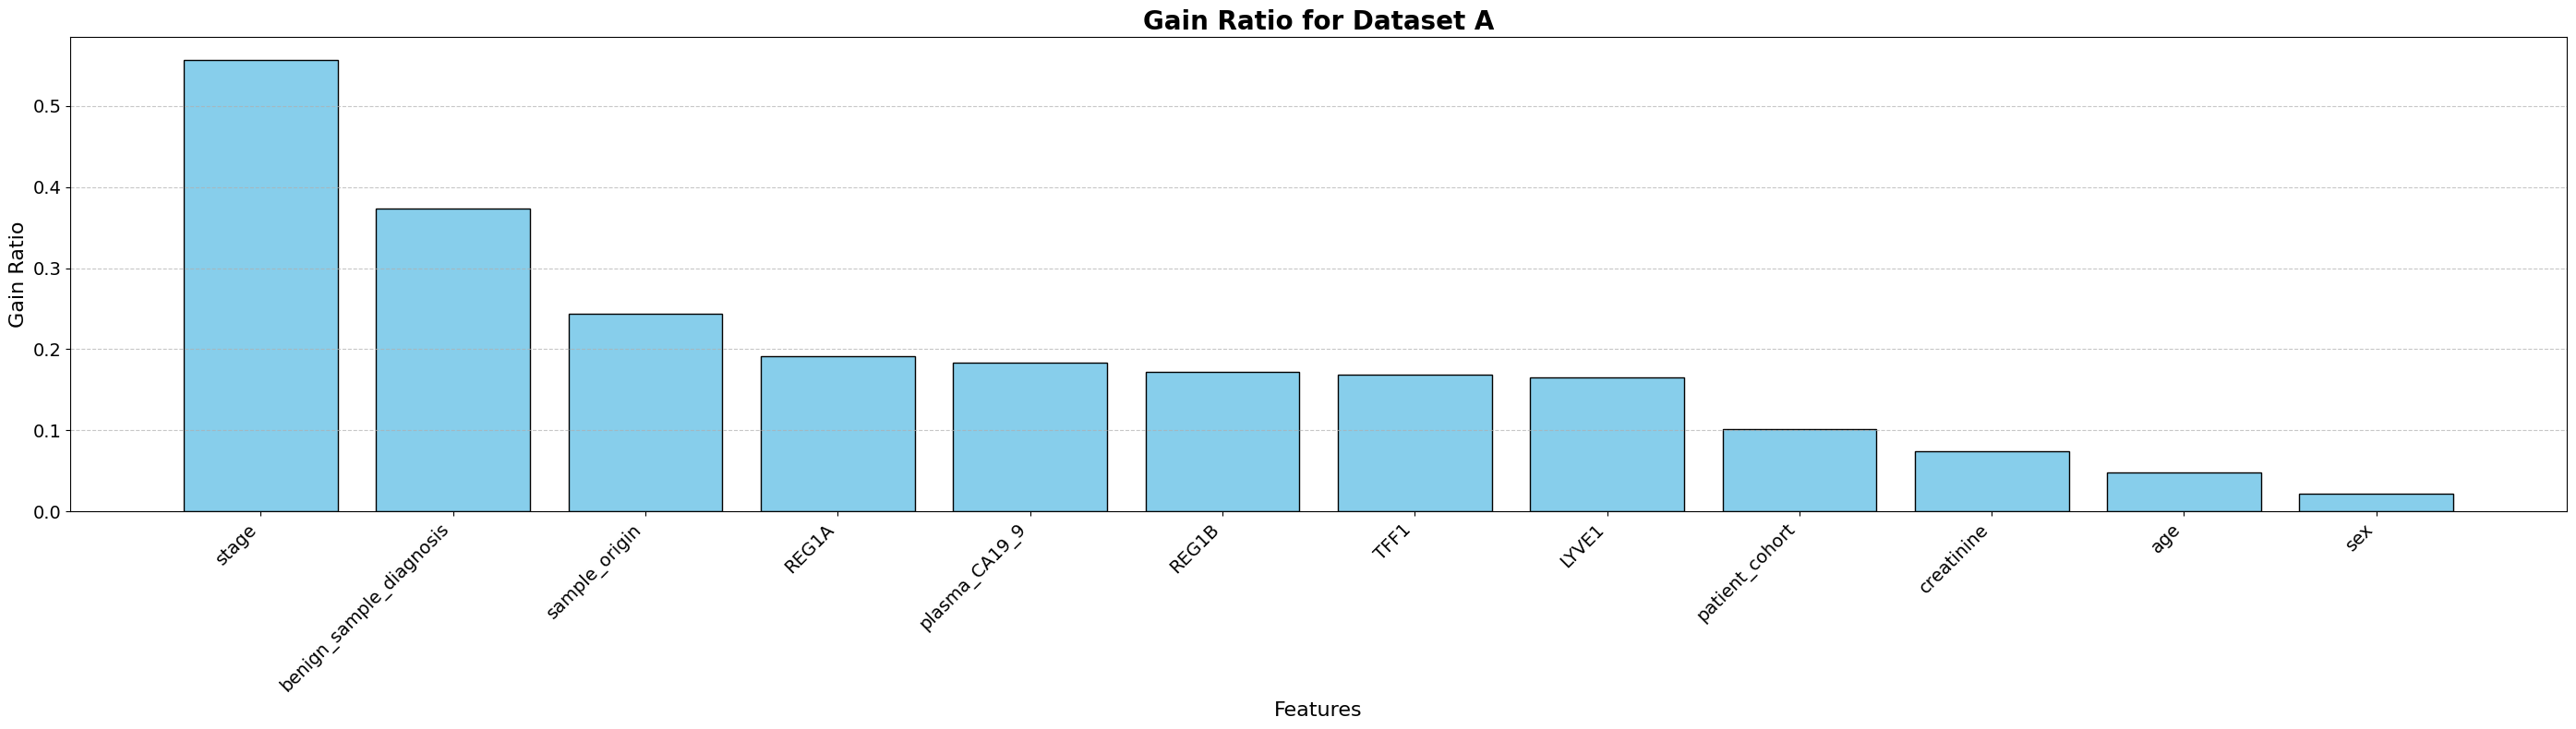

In [291]:
import matplotlib.pyplot as plt

# Plotting the gain ratios
plt.figure(figsize=(28, 8))
ax1 = plt.subplot(1, 1, 1)  # only 1 subplot needed

# Plot only the Gain Ratio values
ax1.bar(gain_ratio_results['Feature'], gain_ratio_results['Gain Ratio'], color='skyblue', edgecolor='black')

ax1.set_title('Gain Ratio for Dataset A', fontsize=20, fontweight='bold')
ax1.set_xlabel('Features', fontsize=16)
ax1.set_ylabel('Gain Ratio', fontsize=16)
ax1.set_xticklabels(gain_ratio_results['Feature'], rotation=45, ha='right', fontsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig("Gain Ratio for Dataset A.pdf")  # save figure
plt.show()


In [292]:
# Compute Information Gains for all features
information_gains = {feature: information_gain(X_res, y_res, feature) for feature in X_res.columns}

# Convert to a DataFrame for easy visualization
information_gain_results = pd.DataFrame(information_gains.items(), columns=['Feature', 'Information Gain'])
information_gain_results = information_gain_results.sort_values(by="Information Gain", ascending=False)

# Display the results
print(information_gain_results)


                    Feature  Information Gain
9                     REG1B          1.572787
11                    REG1A          1.563208
10                     TFF1          1.532109
8                     LYVE1          1.485695
6             plasma_CA19_9          1.433634
5   benign_sample_diagnosis          0.936318
4                     stage          0.922200
7                creatinine          0.539012
1             sample_origin          0.299870
2                       age          0.272715
0            patient_cohort          0.100472
3                       sex          0.021726


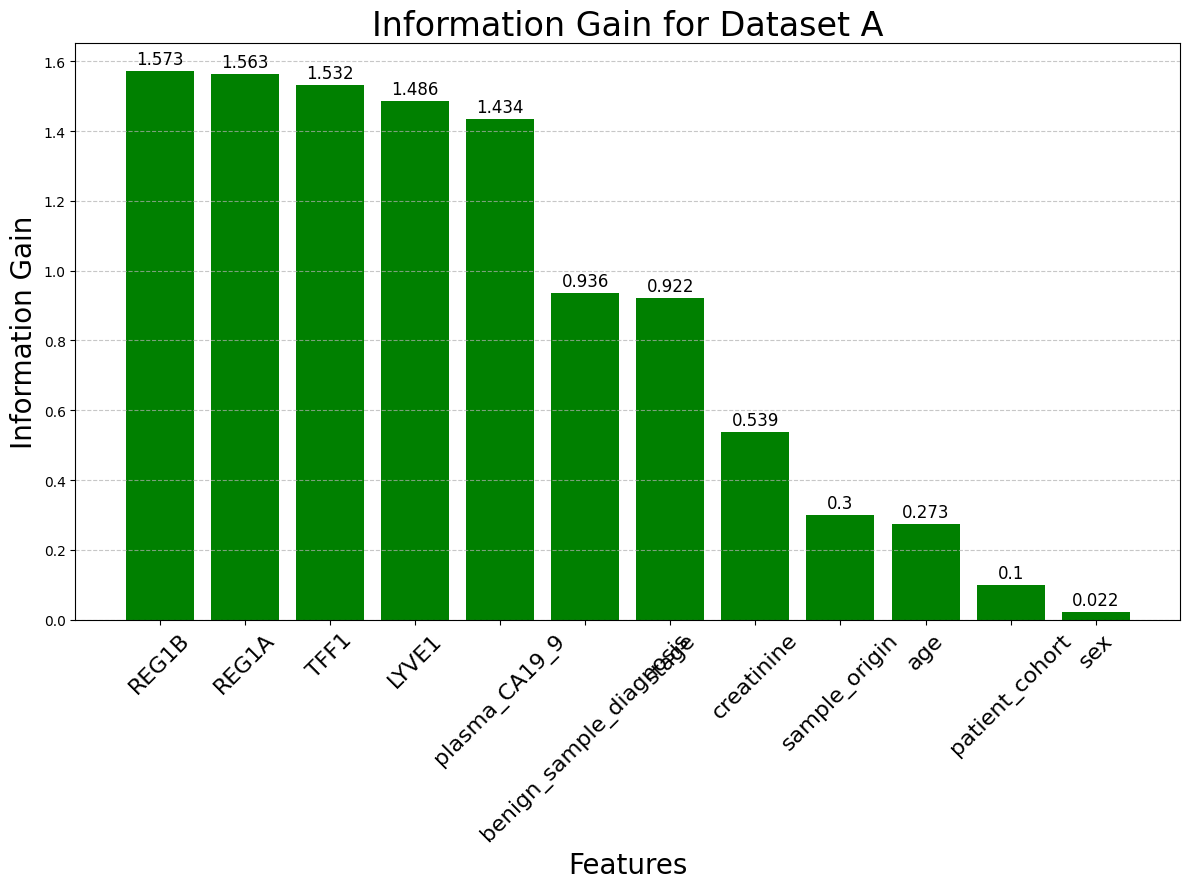

In [293]:
# Make sure information_gain_results exists
ig_df = information_gain_results.reset_index(drop=True)  # Reset index
ig_df.columns = ['Feature', 'IG']  # Rename columns for convenience

plt.figure(figsize=(12, 9))

bars = plt.bar(ig_df['Feature'], ig_df['IG'], color='green')
plt.xlabel('Features', fontsize=20)
plt.xticks(fontsize=16, rotation=45)
plt.ylabel('Information Gain', fontsize=20)
plt.title('Information Gain for Dataset A', fontsize=24)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bar values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 3), ha='center', fontsize=12)

plt.tight_layout()
plt.savefig("Information Gain for Dataset A.pdf", bbox_inches='tight')
plt.show()
